# 梯度下降算法： 一元线性回归

## 1. 生成数据

实例数m=100, 一个特征x， 输出为y

$y = \theta_0 + \theta_1x + \epsilon$, 假设$x$为服从标准正态分布的变量，$\epsilon$也是服从标准正态分布的变量, $\theta_0=1$, $\theta_1=5$

### 1.1 生成特征x (一维)： 假设x是服从标准正态的变量

使用numpy中的random.normal函数：
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [1]:
import numpy as np

n_sample = 100 ## 实例数为100

x = np.random.normal(loc=0.0, scale = 1.0, size=(n_sample)) ## loc代表均值，scale代表标准差，size代表数据的维数

In [2]:
x

array([ 0.17457231, -1.88734069,  0.27378712, -0.77648721, -0.55958724,
       -0.47063225, -0.73808536,  1.83957058,  0.00309406,  0.75130573,
       -0.33413325, -0.67389771,  0.17315008,  1.85041587, -0.87348334,
       -1.96649657,  0.82003852, -0.78804404,  0.35489975, -0.49567212,
        0.07673238,  0.30729399,  2.68804152,  0.13240582,  0.23217722,
       -1.83258787,  1.28117284,  0.54196538, -0.32533976, -1.11867033,
       -0.01498879,  1.0623883 ,  0.37982087, -0.55896314,  0.31840562,
       -0.73290621, -2.27582182, -0.92759081, -0.27458454,  0.63341354,
        0.61544656, -0.84228229,  1.60131077, -1.6459211 ,  0.56044429,
       -0.2772544 , -0.63481569,  0.180513  ,  0.16081974,  1.25953333,
       -0.77834629,  0.04685155,  0.07263471,  0.15991183,  1.1204807 ,
        1.48192329,  0.58972851,  0.07847677,  1.38081866, -0.92665483,
       -0.70238255, -0.73982969,  0.93952313, -0.51508744, -0.38694504,
       -2.47577512,  0.94221022,  1.10680504, -0.05306652, -0.25

### 1.2 生成误差项（随机扰动项）$\epsilon$， 服从标准正态分布

In [3]:
e = np.random.normal(loc=0.0, scale = 1.0, size=(n_sample))

### 1.3 生成输出Y

In [4]:
true_theta0 = 1 ## theta0的真实值
true_theta1 = 5 ## theta1的真实值

y = true_theta0 + true_theta1*x + e

In [5]:
y

array([  2.32923731,  -7.16638212,   3.10877543,  -1.60190769,
        -1.3969536 ,  -1.39167754,  -1.85301389,  11.01010765,
        -0.29442565,   4.94834741,  -0.87581756,   0.32833046,
         0.29807139,  11.48496226,  -3.50861901, -11.69077408,
         4.41707948,  -2.96033472,   2.80205281,  -1.70904702,
         1.4479437 ,   3.69011649,  14.49024055,   1.64018481,
         3.98587546,  -8.42481847,   7.99304026,   2.82230899,
         1.52630761,  -4.71756069,  -0.34753396,   7.41768323,
         3.18416632,  -2.68753459,   1.50251375,  -1.81041208,
       -10.38252828,  -3.38692901,  -0.27550106,   4.87383952,
         4.01186224,  -1.89741417,   7.85375635,  -8.11705784,
         4.78146176,  -2.56424827,  -1.61991413,   2.75432777,
         3.23374325,   7.90789787,  -2.79160518,   0.51737102,
         0.66436404,   2.46588962,   5.407513  ,  10.35762832,
         3.62267122,   1.31928176,   8.67470548,  -3.22718713,
        -2.66046195,  -1.77976574,   5.8112175 ,  -1.40

## 2. 定义代价函数(cost function)

线性回归模型$h(x)=\theta_0+\theta_1x$的成本函数为平均均方误差：$J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^2$

In [6]:
def cost_fnc(x, y, theta0, theta1):
    m = x.shape[0] ## m为实例数
    
    ## 计算一元线性回归的成本：用for循环计算所有实例的均方误差和
    cost = 0 # 成本的初始值为0     
    for i in range(m): # 对每一个实例i，计算均方误差
        h_theta = theta0 + theta1*x[i]  ## h(xi)
        cost = cost + (h_theta - y[i])**2  
    
    average_cost = 1/(2*m)*cost ## 求平均
        
    return average_cost    # cost_fnc将返回平均均方误差

## 3. 定义梯度函数 (gradient)

对$\theta_0$求偏导：$\frac{\partial J}{\partial \theta_0}=\frac{1}{m}\sum_{i=1}^m(h(x^{(i)}) - y^{(i)})$

对$\theta_1$求偏导：$\frac{\partial J}{\partial \theta_1}=\frac{1}{m}\sum_{i=1}^m(h(x^{(i)}) - y^{(i)})x^{(i)}$

In [7]:
def gradient_fnc(x, y, theta0, theta1):
    
    m = x.shape[0]
    
    
    dj_theta0 = 0  ## 用dJ/dtheta0代表J关于theta0的偏导，初始值为0
    dj_theta1 = 0  ## 用dJ/dtheta1代表J关于theta1的偏导，初始值为0
    
    ## for循环：按上面公式对每个实例i求和
    for i in range(m):
        h_theta = theta0 + theta1*x[i]
        dj_theta0_i = (h_theta - y[i])  
        dj_theta1_i = (h_theta - y[i])*x[i]  
        
        dj_theta0 = dj_theta0 + dj_theta0_i # 求和
        dj_theta1 = dj_theta1 + dj_theta1_i
        
    dj_theta0 = dj_theta0 / m
    dj_theta1 = dj_theta1 / m
    
    return dj_theta0, dj_theta1 # gradient_fnc将返回J对于theta0和theta1的偏导

## 4. 定义梯度下降算法函数

参数在每一次迭代的更新公式： $\theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j}, j = 0, 1$

In [8]:
def gradient_descent(x, y, theta0_init, theta1_init, alpha, max_iter, tol, cost_fnc, gradient_fnc):
    
    """
    theta0_init: theta0的初始值
    theta1_init: theta1的初始值
    alpha: 学习率
    max_iter: 循环/迭代的最大次数
    tol: 收敛条件:如果当前一步的代价J_current与上一步的代价J_old之差的绝对值<tol,则停止
    cost_fnc: 代价函数
    gradient_fnc: 梯度函数
    """
    
    Js = []  # 设置一个空List，将存储每次迭代的代价值
    
    theta0 = theta0_init # 设置theta0为其初始值
    theta1 = theta1_init # 设置theta1为其初始值
    
    theta0_hist = [] # 设置一个空List，将存储每次迭代的theta0值
    theta1_hist = [] # 设置一个空List，将存储每次迭代的theta1值

    # i记录迭代\循环次数
    i = 0
    while i < max_iter:
        J_old = cost_fnc(x, y, theta0, theta1) # 计算上一步的代价, theta0, theta1为上一步的值
        dj_theta0, dj_theta1 = gradient_fnc(x, y, theta0, theta1)  # 计算偏导，theta0、theta1为上一步的值
        
        # 更新theta0, theta 1
        theta0 = theta0 - alpha * dj_theta0  # 填写theta0的更新公式
        theta1 = theta1 - alpha * dj_theta1  # 填写theta1的更新公式
        
        J_current = cost_fnc(x, y, theta0, theta1)  # 计算更新后的代价
        
        Js.append(J_current) # 使用append函数，在Js中加入每次的代价J_current
        theta0_hist.append(theta0) # 在theta0_hist中加入每次更新后的theta0
        theta1_hist.append(theta1) # 在theta1_hist中加入每次更新后的theta1
        
        num_iter = i + 1 ## 记录迭代次数，在循环结束后，它存储的是最终的迭代次数
        
        if (abs(J_current - J_old) < tol): break # 如果当前一步的代价J_current与上一步的代价J_old之差的绝对值<tol,则停止
            
        i = i + 1 # 循环次数加1    
        
     
    return theta0, theta1, Js, theta0_hist, theta1_hist, num_iter # # type: ignore 返回最终的theta0, theta1, 每次的代价Js，以及每次的theta0和theta1值

## 5. 在生成的数据上用梯度下降拟合线性回归

In [9]:
theta0_init = 0
theta1_init = 0

max_iter = 100000

tol = 0.00000001
alpha = 0.001

theta0_final, theta1_final, Js, theta0_hist, theta1_hist, num_iter = gradient_descent(x, y, theta0_init, theta1_init, alpha, max_iter, tol, cost_fnc, gradient_fnc)

## 6. 评价参数的估计

查看估计的$\theta_0$, $\theta_1$值

In [10]:
theta0_final, theta1_final,num_iter

(1.0669681212701714, 5.1315310521131385, 8531)

计算参数$\theta$的均方误差： 

In [11]:
MSE = ((theta0_final - true_theta0)**2 + (theta1_final - true_theta1)**2)/2  ## 计算参数的均方误差

print(MSE)

0.010892573468222774


## 7. 查看代价J如何随迭代变化

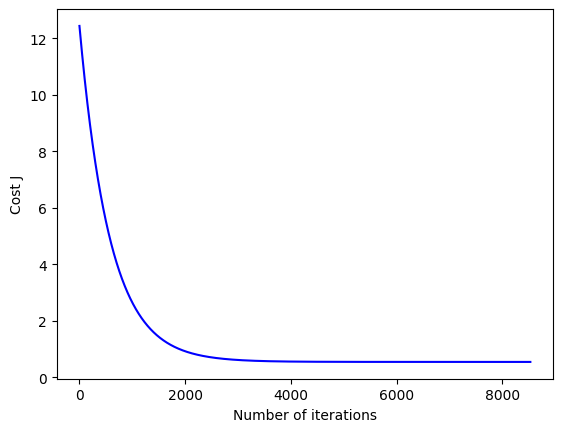

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(Js)), Js, 'b') 
plt.xlabel("Number of iterations")
plt.ylabel('Cost J')
plt.show()

### Q: 结果好吗？梯度下降算法是否收敛？查看num_iter。如果没有收敛，请增大max_iter的值。

### Q： 尝试改变步长alpha的值

查看每次迭代相对应的$\theta_0$, $\theta_1$，和代价J的值

In [13]:
import pandas as pd

df = pd.DataFrame(columns = ['theta0', 'theta1', 'cost'])
df['theta0'], df['theta1'], df['cost'] = theta0_hist, theta1_hist, Js

In [14]:
df

,theta0,theta1,cost
0,0.000577,0.004519,12.437591
1,0.001155,0.009034,12.416880
2,0.001732,0.013545,12.396206
3,0.002309,0.018052,12.375569
4,0.002886,0.022556,12.354967
...,...,...,...
8526,1.066962,5.131520,0.547284
8527,1.066964,5.131523,0.547284
8528,1.066965,5.131525,0.547284
8529,1.066967,5.131528,0.547284


## 8. 评价输出Y的预测准确度

In [15]:
y_pred = theta0_final + theta1_final*x

In [16]:
from sklearn import metrics
import numpy as np

MSE_y = metrics.mean_squared_error(y_pred, y)


In [17]:
MSE_y

1.0945673639000426

In [18]:
MSE_y = sum((y_pred - y)**2)/len(y) ## 与上面等价
MSE_y

1.0945673639000426

## 9. 与最小二乘法比较

函数LinearRegression()使用的是最小二乘法

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linreg = LinearRegression() ## 使用默认参数设置

In [21]:
linreg.fit(x.reshape(-1, 1), y)

LinearRegression()

In [22]:
print (linreg.intercept_)
print (linreg.coef_)

1.0687280661760497
[5.13484024]
